<table style="width: 100%;"> <tr> <td style="width: 20%; vertical-align: top;"> <img src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" alt="UdeA" height="150px"> </td> <td style="width: 80%; padding-left: 20px;"> <strong style="font-size: 30px;">EXPLORACIÓN, PREPROCESAMIENTO, REDIMENSIONAMIENTO Y PREPARACIÓN DE LOS DATOS PARA DESARROLLAR UN SISTEMA DE CLASIFICACIÓN CON IMÁGENES </strong><br><br> <span style="font-size: 30px;"> Luisa Fernanda Alzate Cuartas <br> Juan Camilo Henao Caro<br>Isabella Mendez Hoyos<br> Fernando Antonio Piñeres Ramos </span> </td> </tr> </table>

##### LIBRERÍAS
----------

In [ ]:
#Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/operaciones')

In [ ]:
!ls /content/drive/MyDrive/operaciones/

a_preprocesamiento.ipynb  b_modelo.ipynb  funciones.py	README.md
best_model.h5		  data		  __pycache__	salidas


In [ ]:
#Importe de librerías requeridas
import numpy as np ## para trabajar con arregloS
import cv2 ### para leer imagenes jpeg
from matplotlib import pyplot as plt ## para gráfciar imágnes
import joblib ### para descargar array
import shutil
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from funciones import resize_and_copy
from pathlib import Path
import os
from funciones import cargar_imagenes_en_array

##### VISUALIZACIÓN Y EXPLORACIÓN - IMÁGENES DE RESONANCIA MAGNÉTICA CEREBRAL (MRI)
-----------

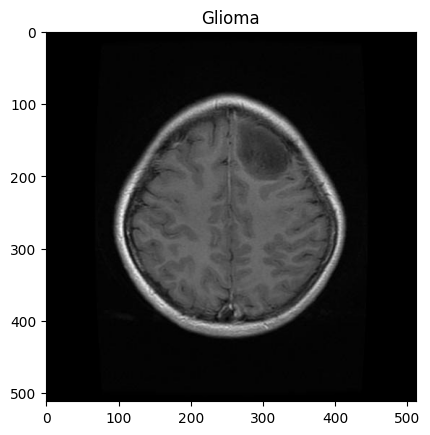

In [ ]:
#Imagen de resonancia magnética - tumor llamado glioma.
img1=cv2.imread('/content/drive/MyDrive/operaciones/data/glioma/glioma_test_0002.jpg')  # NOTA: Para ver otras imágenes de esta categoría, puedes cambiar el número '0002', por ejemplo 0001.
plt.imshow(img1)
plt.title('Glioma')
plt.show()

`Los gliomas son un tipo de tumor cerebral primario que se originan de las células gliales del cerebro (astrocitos, oligodendrocitos, ependimocitos). Son conocidos por su naturaleza infiltrativa, lo que significa que crecen y se mezclan con el tejido cerebral sano circundante, lo que los hace difíciles de extirpar completamente.`










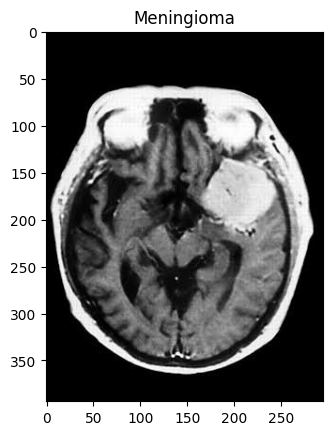

In [ ]:
#Imagen de resonancia magnética - tumor llamado Meningioma.
img2=cv2.imread('/content/drive/MyDrive/operaciones/data/meningioma/meningioma_test_0001.jpg') # NOTA: Para ver otras imágenes de esta categoría, puedes cambiar el número '0002', por ejemplo 0001.
plt.imshow(img2)
plt.title('Meningioma')
plt.show()

`Los meningiomas son tumores que se desarrollan a partir de las meninges, las membranas que cubren el cerebro y la médula espinal. A diferencia de los gliomas, generalmente son benignos (no cancerosos) y crecen lentamente. Son tumores extra-axiales, lo que significa que crecen fuera del tejido cerebral propiamente dicho.`

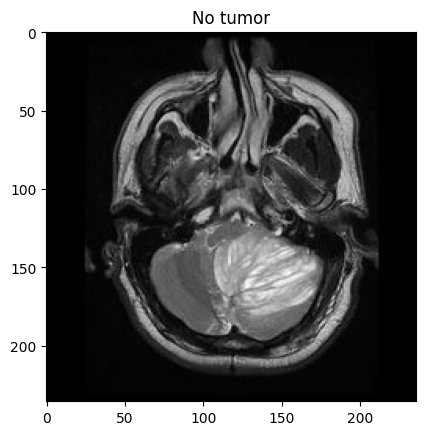

In [ ]:
#Imagen de resonancia magnética - no existe presencia de un tumor.
img3=cv2.imread('/content/drive/MyDrive/operaciones/data/notumor/notumor_test_0000.jpg') # NOTA: Para ver otras imágenes de esta categoría, puedes cambiar el número '0000', por ejemplo 0001.
plt.imshow(img3)
plt.title('No tumor')
plt.show()

` Las imágenes corresponden a tejido cerebral normal, sano y anatómico. Es decir, existe ausencia de masas, anatomía cerebral esperada y simétrica para la edad del paciente. Contornos del cerebro y estructuras internas son lisos y bien definidos. `

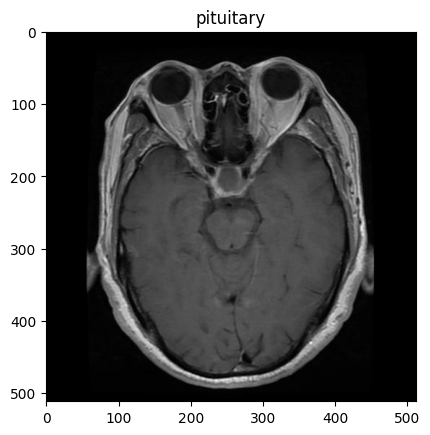

In [ ]:
#Imagen de resonancia magnética - tumor llamado pituitary.
img4=cv2.imread('/content/drive/MyDrive/operaciones/data/pituitary/pituitary_test_0005.jpg') # NOTA: Para ver otras imágenes de esta categoría, puedes cambiar el número '0005', por ejemplo 0001.
plt.imshow(img4)
plt.title('pituitary')
plt.show()

`Los adenomas pituitarios son tumores que se desarrollan en la glándula pituitaria (hipófisis), una pequeña glándula ubicada en la base del cerebro, dentro de una estructura ósea llamada silla turca. Pueden ser funcionales (produciendo hormonas en exceso) o no funcionales.`

##### EXPLORACIÓN NUMÉRICA DE LAS IMÁGENES DE RESONANCIA MAGNÉTICA CEREBRAL
---

In [ ]:
#Dimensiones o tamaños en término de píxeles y canales
print(f'Para la imagen de muestra del Glioma: Alto={img1.shape[0]} píxeles, Ancho={img1.shape[1]} píxeles, Canales={img1.shape[2]} RGB.')
print(f'Para la imagen de muestra Meningioma: Alto={img2.shape[0]} píxeles, Ancho={img2.shape[1]} píxeles, Canales={img2.shape[2]} RGB.')
print(f'Para la imagen de muestra de No tumor: Alto={img3.shape[0]} píxeles, Ancho={img3.shape[1]} píxeles, Canales={img3.shape[2]} RGB.')
print(f'Para para la imagen de muestra de Pituitary: Alto={img4.shape[0]} píxeles, Ancho={img4.shape[1]} píxeles, Canales={img4.shape[2]} RGB.')

Para la imagen de muestra del Glioma: Alto=512 píxeles, Ancho=512 píxeles, Canales=3 RGB.
Para la imagen de muestra Meningioma: Alto=394 píxeles, Ancho=295 píxeles, Canales=3 RGB.
Para la imagen de muestra de No tumor: Alto=236 píxeles, Ancho=236 píxeles, Canales=3 RGB.
Para para la imagen de muestra de Pituitary: Alto=512 píxeles, Ancho=512 píxeles, Canales=3 RGB.


`Durante la exploración inicial de las imágenes, se observó que, a pesar de pertenecer al mismo conjunto de datos, las imágenes presentaban dimensiones originales variadas. Esta heterogeneidad en el tamaño es una característica importante a considerar antes del entrenamiento del modelo.`

In [ ]:
print(f'Para la imagen de muestra del Glioma: Valor Max intesidad = {img1.max()}, valor Min de intensidad= {img1.min()}, Valores entre 0 y 225 = {np.prod(img1.shape)}.')
print(f'Para la imagen de muestra Meningioma: Valor Max intesidad = {img2.max()}, valor Min de intensidad= {img2.min()}, Valores entre 0 y 225 = {np.prod(img2.shape)}.')
print(f'Para la imagen de muestra de No tumor: Valor Max intesidad = {img3.max()}, valor Min de intensidad= {img3.min()}, Valores entre 0 y 225 = {np.prod(img3.shape)}.')
print(f'Para para la imagen de muestra de Pituitary: Valor Max intesidad = {img4.max()}, valor Min de intensidad= {img4.min()}, Valores entre 0 y 225 = {np.prod(img4.shape)}.')

Para la imagen de muestra del Glioma: Valor Max intesidad = 255, valor Min de intensidad= 0, Valores entre 0 y 225 = 786432.
Para la imagen de muestra Meningioma: Valor Max intesidad = 255, valor Min de intensidad= 0, Valores entre 0 y 225 = 348690.
Para la imagen de muestra de No tumor: Valor Max intesidad = 255, valor Min de intensidad= 0, Valores entre 0 y 225 = 167088.
Para para la imagen de muestra de Pituitary: Valor Max intesidad = 253, valor Min de intensidad= 0, Valores entre 0 y 225 = 786432.


`El valor máximo en la mayoría de las imágenes de muestra que un píxel es de 255 y el valor mínimo es de 0, indicando que estos son negro puro(0), blanco(255) y grises(valores intermedios de 1 al 254).`

##### EXPERIMENTACIÓN PARA REDIMENSIONAR DE LAS IMÁGENES DE RESONANCIA MAGNÉTICA DEL CEREBRO.
---

`Dado que los modelos de redes neuronales convolucionales requieren entradas de tamaño uniforme, todas las imágenes deben ser redimensionadas a un tamaño fijo,estandarizando sus dimensiones para el procesamiento del modelo`.

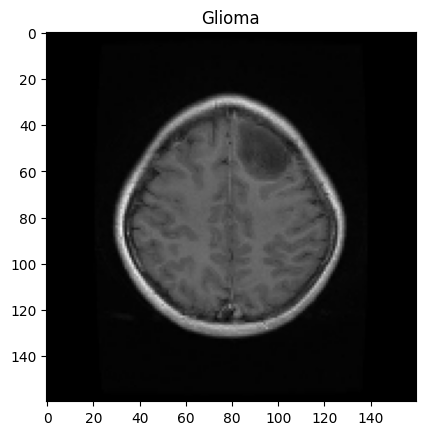

In [ ]:
#Visualización para el redimensionamiento de la imagen de muestra Glioma.
img1_r = cv2.resize(img1 ,(160,160))
plt.imshow(img1_r)
plt.title('Glioma')
plt.show()

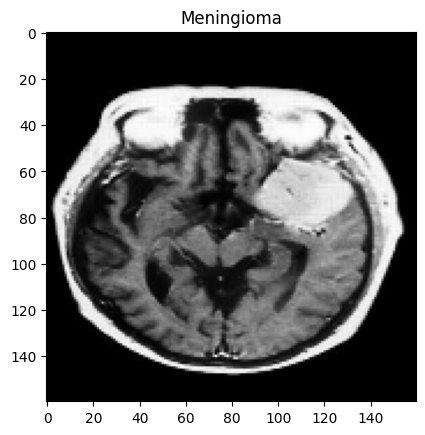

In [ ]:
#Visualización para el redimensionamiento de la imagen de muestra Meningioma.
img2_r = cv2.resize(img2 ,(160,160))
plt.imshow(img2_r)
plt.title('Meningioma')
plt.show()

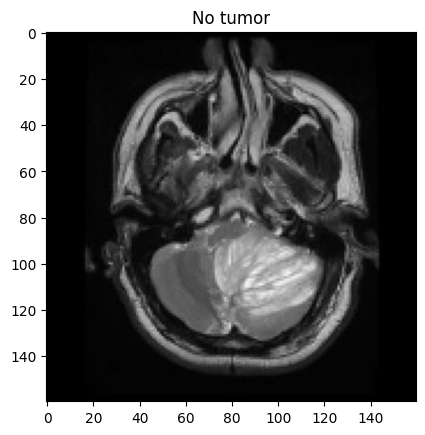

In [ ]:
#Visualización para el redimensionamiento de la imagen de muesta No tumor.
img3_r = cv2.resize(img3 ,(160,160))
plt.imshow(img3_r)
plt.title('No tumor')
plt.show()

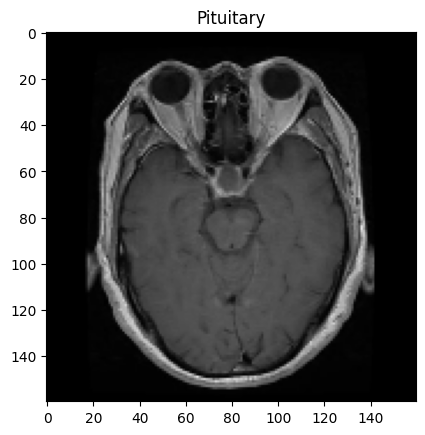

In [ ]:
#Visualización para el redimensionamiento de la imagen de muesta Pituitrary.
img4_r = cv2.resize(img4 ,(160,160))
plt.imshow(img4_r)
plt.title('Pituitary')
plt.show()

`Durante la experimientación con el redimensionamiento de la imágenes, se observo que resoluciones inferiores a 130x130 píxeles, la calida visual de las imágenes presentan pérdida notable de detalles y nitidez de las estructuras cerebrales. Un tamaño de 160x160 píxeles permite conservar una cantidad significativa de detalles de las imágenes originales. `

##### REDIMENSIONAMIENTO Y DIVISIÓN DEL CONJUNTO DE DATOS

In [ ]:
# --- Configuración ---
source_dir = '/content/drive/MyDrive/operaciones/data' # Directorio donde se va a leer el conjunto de datos(imágenes)
output_base = '/content/drive/MyDrive/operaciones/salidas/data_modelo' #Directorio dónde se almacenará la división de los datos(imágenes)
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
image_size = (160, 160)  # Puedes cambiar el tamaño aquí

# --- Cargar rutas y etiquetas ---
filepaths = []  #Lista vacia que guarda las rutas completas de cada archivo de imagen.
labels = [] #Lista vacia que guarda las etiquetas de clase a la que pertenece('glioma', 'meningioma', 'notumor', 'pituitary')

for cls in classes: # itera sobre cada nombre de clase ['glioma', 'meningioma', 'notumor', 'pituitary'] y tomará el valor de una de esas clases.
    cls_folder = os.path.join(source_dir, cls) #Contiene la ruta de la base de datos original
    images = glob(os.path.join(cls_folder, '*.jpg')) #Construye un patrón de búsqueda para glob. *.jpg significa "cualquier archivo que termine con .jpg y Devuelve una lista de las rutas completas de todas las imágenes .jpg
    filepaths.extend(images) # Toma la lista de rutas de imágenes (images) encontradas para la clase actual y las añade al final de la lista filepaths global.
    labels.extend([cls] * len(images)) #Añade esta lista de etiquetas repetidas al final de la lista labels global.

df = pd.DataFrame({'filepath': filepaths, 'label': labels})

#recorre las carpetas de tus clases, recopila todas las rutas de las imágenes y sus etiquetas correspondientes, y luego las organiza de manera estructurada en un DataFrame de pandas.

# --- División estratificada ---
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# --- Ejecutar el proceso completo ---
resize_and_copy(train_df, 'train',output_base, image_size)
resize_and_copy(val_df, 'val',output_base, image_size)
resize_and_copy(test_df, 'test',output_base, image_size)

`El conjunto total de imágenes se dividió en tres subconjuntos para las fases de entrenamiento, validación y prueba del modelo. `

`Conjunto de Entrenamiento (Train): 80% del total de imágenes. Este subconjunto se utiliza para entrenar el modelo, ajustando sus pesos y sesgos.`

`Conjunto de Validación (Validation): 10% del total de imágenes. Este subconjunto se empleará para realizar el despligue.`




`Conjunto de Prueba (Test): 10% del total de imágenes. Este subconjunto se utilizará durante el entrenamiento para monitorear el rendimiento del modelo, detectar el sobreajuste (overfitting) y realizar ajustes en los hiperparámetros.`

In [ ]:
train_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/train' #Ruta del conjunto de datos(imágenes) para el entrenamiento del modelo.
val_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/val' # Ruta del conjunto de datos(imágenes) para la validación del modelo.
test_path = '/content/drive/MyDrive/operaciones/salidas/data_modelo/test' # Ruta del conjunto de datos(imágenes) para el testeo del modelo.

#Permite cargar las imágenes y sus etiquetas desde las rutas especificadas y almacenarlas en arreglos de NumPy
x_train, y_train, file_list_train = cargar_imagenes_en_array(train_path)
x_val, y_val, file_list_val = cargar_imagenes_en_array(val_path)
x_test, y_test, file_list_test = cargar_imagenes_en_array(test_path)

##### DATASET FINAL PARA EL ENTRENAMIENTO DEL MODELO.

In [ ]:
# Ruta destino
ruta_salida = "/content/drive/MyDrive/operaciones/salidas/data_final"

# Crear la carpeta si no existe
os.makedirs(ruta_salida, exist_ok=True)

# Guardar archivos
joblib.dump(x_train, os.path.join(ruta_salida, "x_train.pkl"))
joblib.dump(y_train, os.path.join(ruta_salida, "y_train.pkl"))
joblib.dump(x_val,   os.path.join(ruta_salida, "x_val.pkl"))
joblib.dump(y_val,   os.path.join(ruta_salida, "y_val.pkl"))
joblib.dump(x_test,  os.path.join(ruta_salida, "x_test.pkl"))
joblib.dump(y_test,  os.path.join(ruta_salida, "y_test.pkl"))


['/content/drive/MyDrive/operaciones/salidas/data_final/y_test.pkl']

`Cada uno de los conjuntos (x_train, y_train, x_val, y_val, x_test, y_test) se guardó como un archivo individual con la extensión .pkl (formato pickle) en la ruta de salida designada para usar en los modelos y evitar el proceso de proceso de carga, redimensionamiento y división de las imágenes originales cada vez que se necesite entrenar o evaluar el modelo, lo que ahorra tiempo y recursos computacionales.`